In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Importing all the necessary libraries here.

In [2]:
df = pd.read_csv('Titanic_train.csv')

i am uploading Titanic_train csv file

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here we are looking at the first five and last five rows of our entire dataset. We can see that there is a total of 891 rows and 12 columns. The survived column is basically our target label that we need to predict the survival accuracy making this a Classification problem!

# Exploratory Data Analysis (EDA)


In [4]:
df.shape

(891, 12)

y taking a single look at the columns I can confirm that Passenger ID and Name are contributing no inputs since they are just unique values and no insights can be extracted from them so first I will drop them and then check for others one by one.

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Column Names and their data description:

1.PassengerId - Total number of passengers on the ship labelled starting from 1

2.Survived - Survival (0 = No; 1 = Yes)

3.Pclass - Passenger Class (1 = 1st class; 2 = 2nd class; 3 = 3rd class)

4.Name - Name of the passenger

5.Sex - Gender of the passenger

6.Age - Age of the passenger

7.SibSp - Number of Siblings/Spouses Aboard

8.Parch - Number of Parents/Children Aboard

9.Ticket - Ticket Number

10.Fare - Passenger Fare/Price of the ticket

11.Cabin - Cabin/Room numbers where the passengers were staying in the ship

12.Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [6]:
df = df.drop(["PassengerId", "Name","Cabin"], axis=1)

Sucessfuly removed the "PassengerId","Cabin" and "Name" coulmns from our dataset that were logically not useful for predicting the survival of a person on the sinking ship.

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

Checking the missing value data shows that out of 891 records we have 177 missing in the "Age" column while there are only 2 missing data in "Embarked" column.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


With the above information we see a variation in the data types for our columns present in the given dataset. There are 2 columns filled with float values, 4 columns have integer values and the remaining 3 columns have object data type. Since object data type cannot be used to build a machine learning model we will need to check if they have any inputs to provide and encode them for usage purpose.

In [9]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

Using the skew method we can see if there is any skewness in our dataset indicating any kind of outliers. Whether those outliers are genuine or will need to be treated before creating our machine learning model.

The acceptable range for skewness is +/-0.5. We can see that columns 'Survived' and 'Age' are the only one's within that range and for the rest of the columns will need to check for further information on them.

# Visualization

## Count plot

In [10]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [11]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

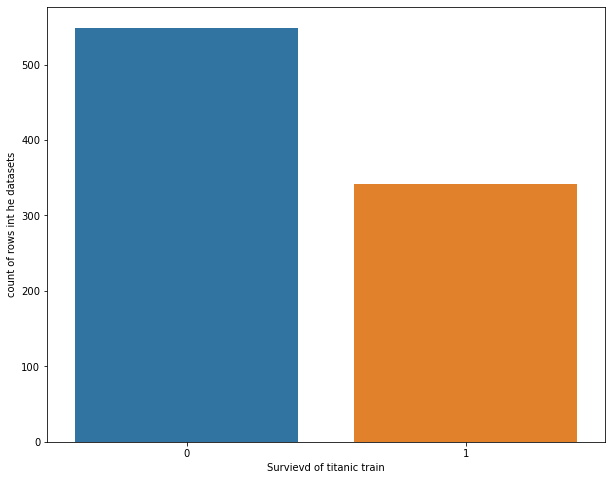

In [12]:
plt.figure(figsize = (10,8))
sns.countplot(x='Survived',data=df)
plt.xlabel('Survievd of titanic train')
plt.ylabel('count of rows int he datasets')
plt.show()

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

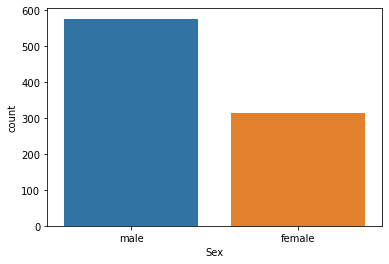

In [14]:
sns.countplot(x ='Sex',data=df)

There are present in sex wise in Titanic train

<AxesSubplot:xlabel='Sex', ylabel='count'>

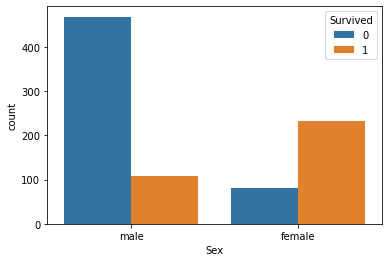

In [15]:
sns.countplot(x='Sex',hue = 'Survived',data=df)

There are survived by sex wise

<AxesSubplot:xlabel='Pclass', ylabel='count'>

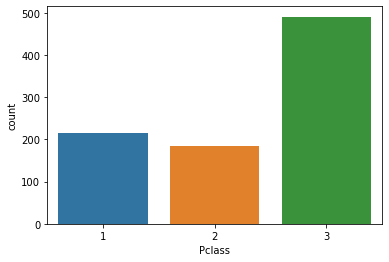

In [16]:
sns.countplot(x='Pclass',data=df)

There are list of class wise member in present at titanic train

<AxesSubplot:xlabel='Pclass', ylabel='count'>

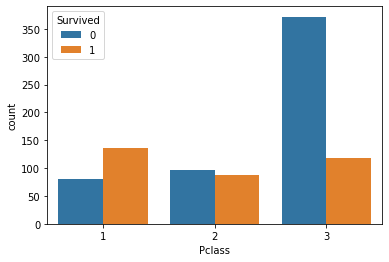

In [17]:
sns.countplot(x='Pclass',hue = 'Survived',data=df)

There are survived by the class wise

## Pair plot

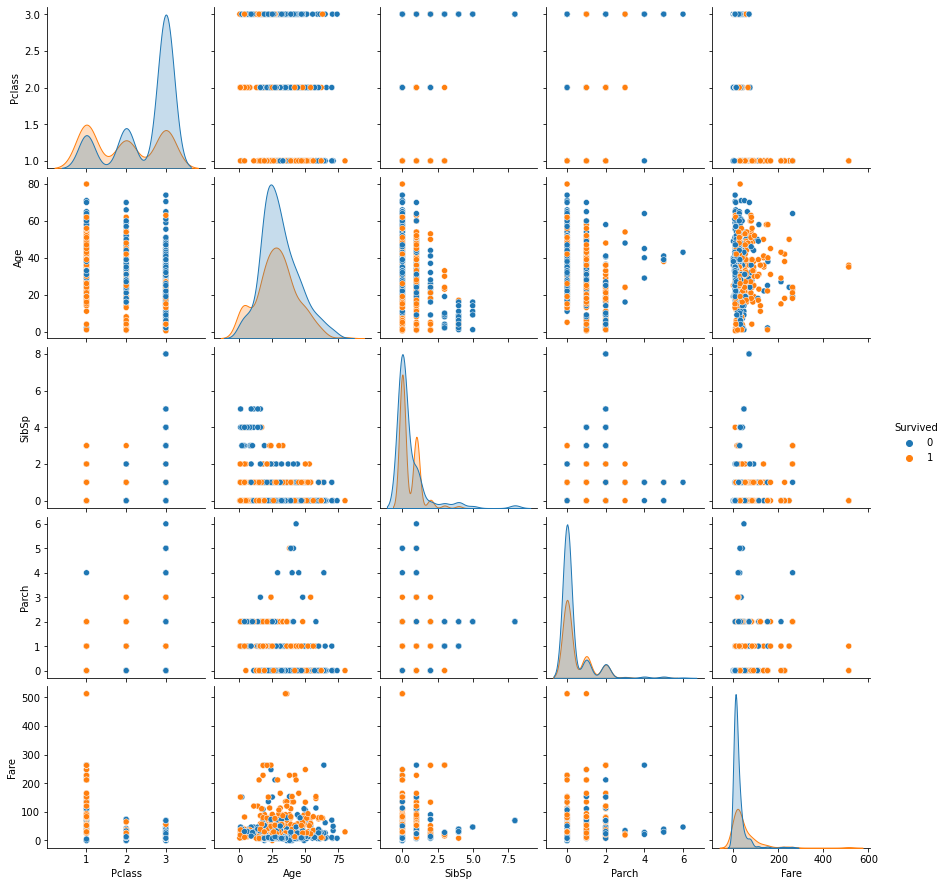

In [18]:
sns.pairplot(df,hue = 'Survived')

The pairplot gives us a visualization on scatter plot + histogram showing us the outliers as well as the skewness data. Looking at the above picture we can see the presence of both skewness and outliers but we shall check few more visuals to confirm if those need to be treated or not.

In [19]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,3,male,NaN,0,0,330877,8.4583,Q
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
8,1,3,female,27.0,0,2,347742,11.1333,S
9,1,2,female,14.0,1,0,237736,30.0708,C


Using the head feature I am looking at the first 20 records of dataset and can observe that again "Ticket" column just shows a list of numbers paired with few alphabets that is basically indicating towards the unique allotment given to the passengers validating them to be eligible the board the Titanic. As it serves no purpose in the prediction of survival rate of the people cruising the Titanic I will remove this column too.

In [20]:
df = df.drop("Ticket", axis=1)

I removed the ticket column from the dataset as it was not something that would play a major role in the survival of a person present on the Titanic.

## Violin Plots

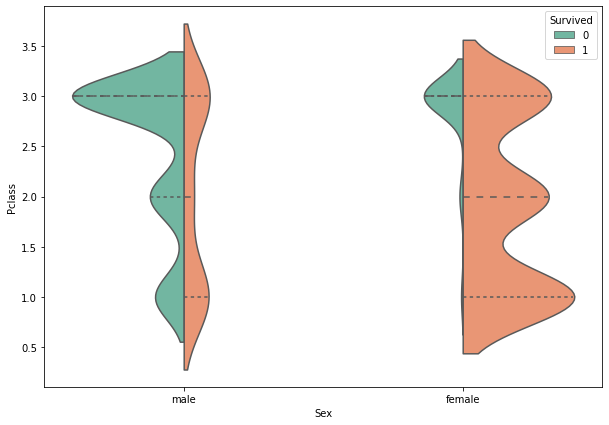

In [21]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Sex", y="Pclass", hue="Survived", data=df, palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above plot when comparing the gender with passenger class we see that the male who were in class 3 died in higher numbers as they were least prioritized.

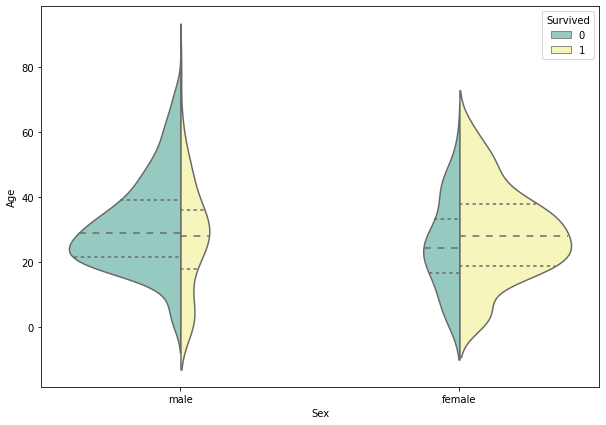

In [22]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, palette="Set3", split=True, scale="count", inner="quartile")
plt.show()

The above figure depiction shows that the females who survived were averagely in their thirties similarly the males who drowned were averagely in their thirties.

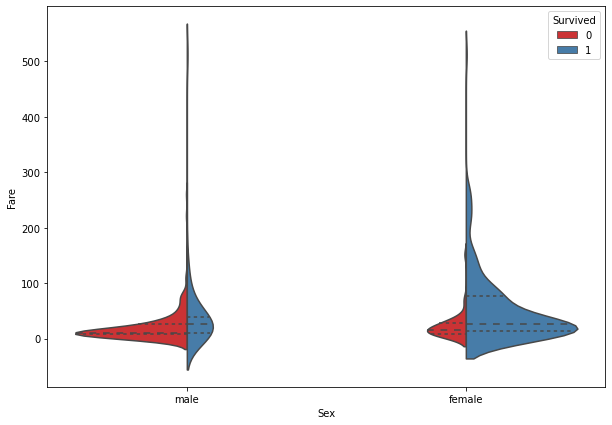

In [23]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Sex", y="Fare", hue="Survived", data=df, palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

The adition of fare column displays that the men who paid the least fare were not allowed to get on the life boats causing them to drown indicating that low priced fare meant a lower class passenger and hence a lower priority over rescuing.

## Box plot

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

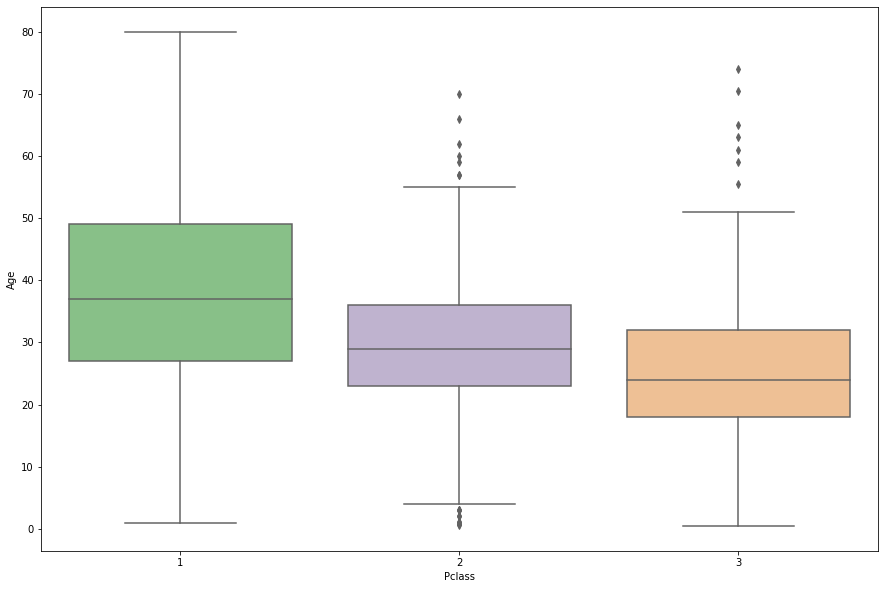

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass', y='Age', data=df, palette="Accent")

For filling the missing value in the age column I am checking the average age of a person in that particular class so that we do not just randomly fill in those years for the age column.

In the above boxplot it shows that the class 1 people who are wealthy are above the average age for the other 2 class and in the class 3 there were mostly youngsters who did not have hefty money at that age.

In [25]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

So we have created a function after applying the observations from the boxplot to get the average age based on the class of travel. In class 1 we see average age as 37, for class 2 the average age is around 29 and class 3 has an approximate avergae age of 24.

We will now use this function to fill the missing age values.

In [26]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [27]:
df["Age"]=df["Age"].fillna(np.mean(df["Age"]))

df['Embarked']=df["Embarked"].fillna(statistics.mode("Embarked"))

Using our fill_age function we have now added the average years data into the age column of our data set.

We have used the mode option to fill the missing data in Embarked column with the value most common for the column row wise

# Encoding of the data

In [28]:
df = pd.get_dummies(df)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_E,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0,0


I am using the pandas get_dummies method to encode the categorical object datatype 'Sex' and 'Embarked' columns. Since get_dummies uses the One Hot Encoding mechanism we are able to get extra columns where the rows are converted to indicator variables.

## Distribution Plot

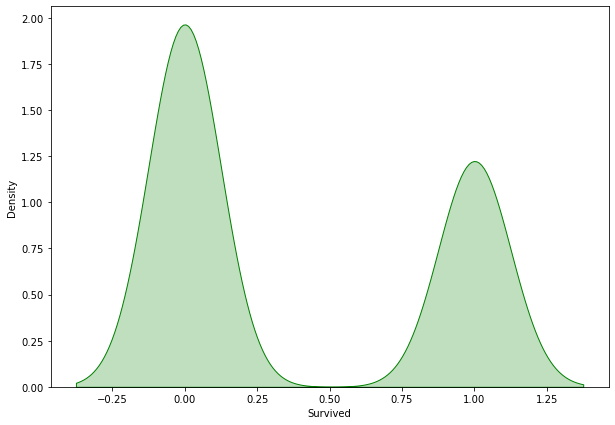

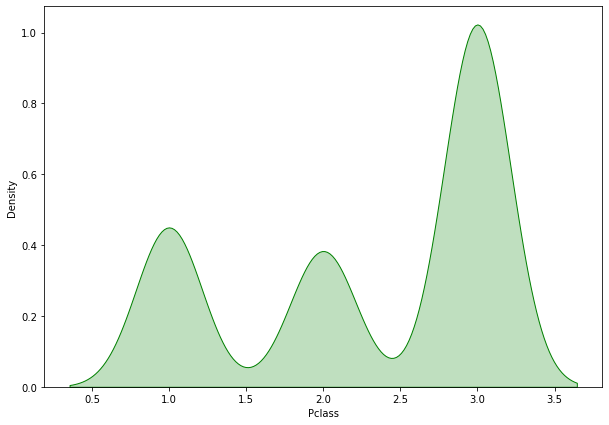

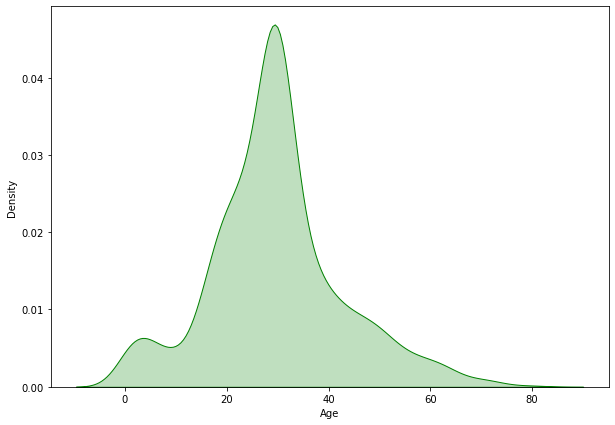

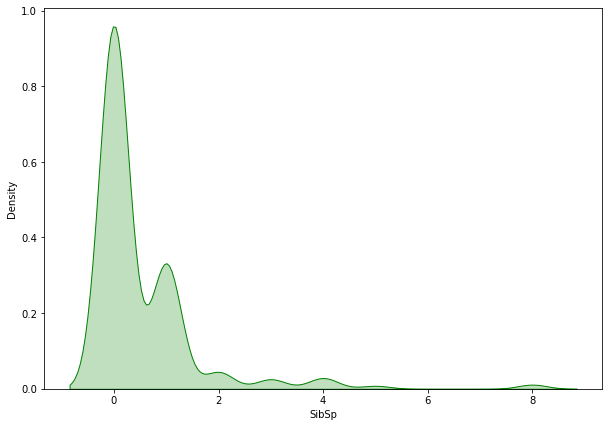

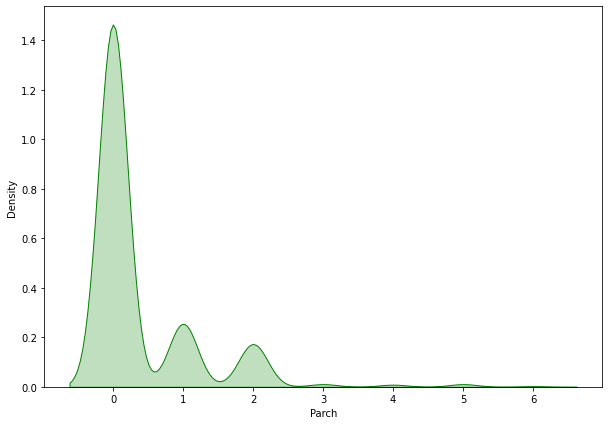

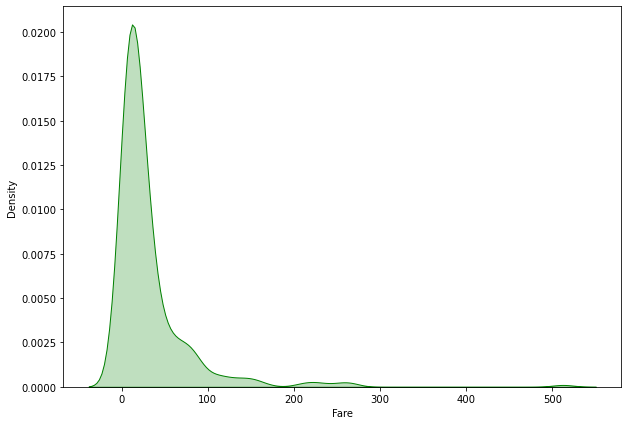

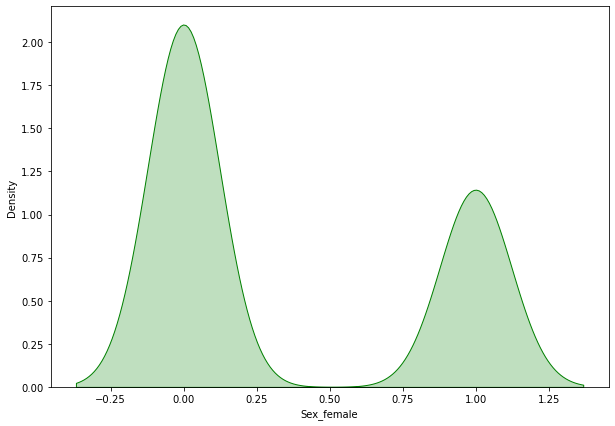

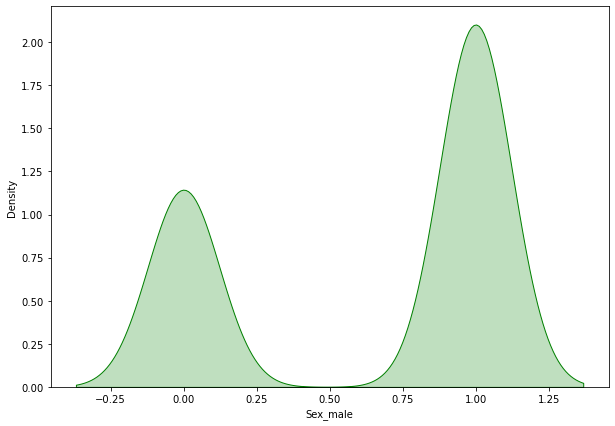

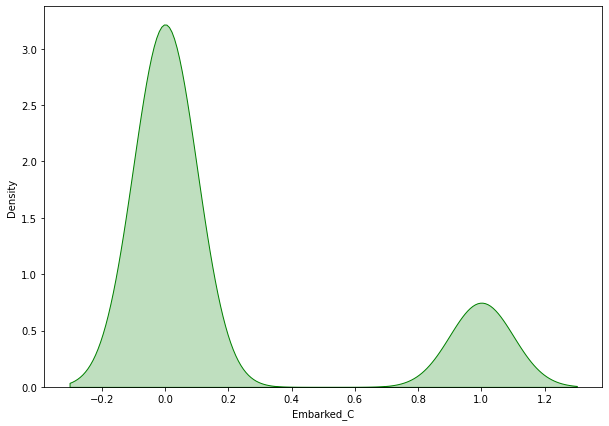

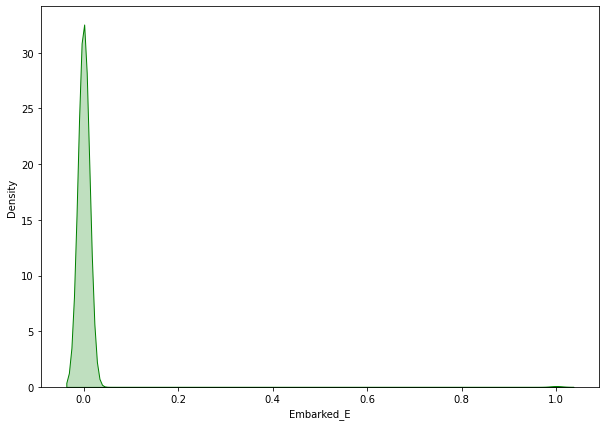

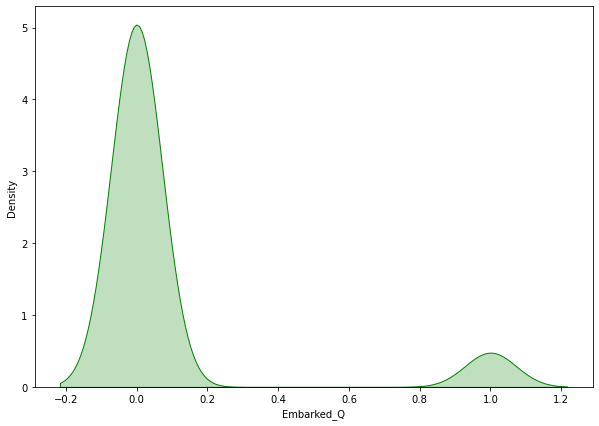

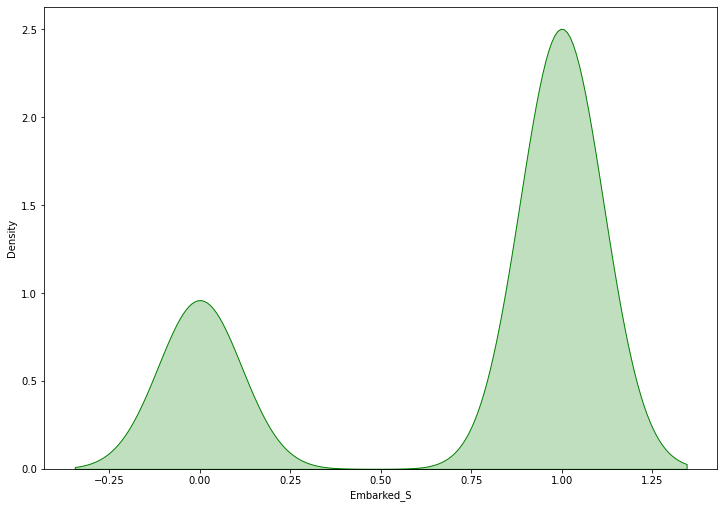

In [29]:
for col, value in df.items():
    plt.figure(figsize=(10,7))
    sns.distplot(value, hist=False, color="g", kde_kws={"shade": True})
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Looking at the distribution plot after applying the encoding technique and ensuring all object datatype are converted to numbers that can be used for visualization we see that the presence of outliers are affecting the distribution patterns and causing skewness that might need to be treated.

But first I will try to build a model retaining all the data and check whether the model accuracy gets affected due to it or not.

# Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [30]:
cor = df.corr()

In [31]:
cor

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_E,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.060095,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,-0.074282,0.221009,0.081720
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.084153,0.032024,0.074099,-0.013855,-0.027121
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.022508,-0.026354,0.070941
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.022467,-0.081228,0.063036
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,0.045646,-0.117216,-0.166603
Sex_female,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.064296,0.074115,-0.125722
Sex_male,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.064296,-0.074115,0.125722
Embarked_C,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.022864,-0.148258,-0.778359
Embarked_E,0.060095,-0.074282,0.074099,-0.022508,-0.022467,0.045646,0.064296,-0.064296,-0.022864,1.000000,-0.014588,-0.076588


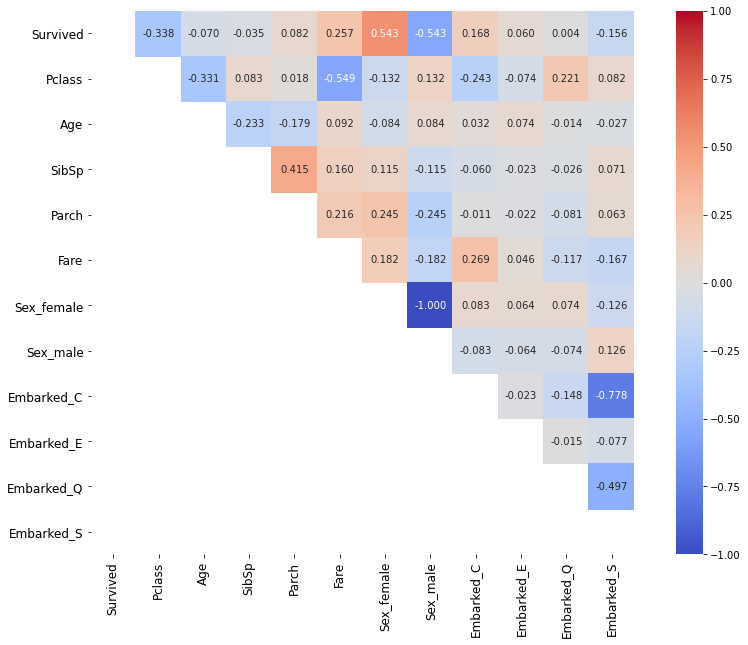

In [32]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(cor, vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="coolwarm", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In the above correlation heatmap we can see that our label has both positive and negative correlation with the other columns present in our dataset.

The female column is a perfect negative correlation to male column since the higher the number of female survivors the lower the number of male survivors.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [33]:
X = df.drop("Survived", axis=1)
Y = df["Survived"]

 I have separated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Feature Scaling

In [34]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_E,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.047431,-0.307562,0.619306
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.047431,-0.307562,-1.614710
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.047431,-0.307562,0.619306
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.047431,-0.307562,0.619306
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.047431,-0.307562,0.619306
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.482043,-0.047431,-0.307562,0.619306
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,1.355574,-1.355574,-0.482043,-0.047431,-0.307562,0.619306
888,0.827377,0.000000,0.432793,2.008933,-0.176263,1.355574,-1.355574,-0.482043,-0.047431,-0.307562,0.619306
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,-0.737695,0.737695,2.074505,-0.047431,-0.307562,-1.614710


Even though all our feature columns were of numeric data type I was unhappy with the decimal place differences and was worried that it might make my model biased towards float and integers. Therefore I am using the Standard Scaler method to ensure all my feature columns have been standardized.

In [35]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_E,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.031048e-16,2.562796e-16,3.456519e-16,6.716164e-17,-4.373606e-17,3.162453e-16,-4.059603e-16,1.167541e-16,1.316599e-16,-4.017238e-16,5.632108e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-2.253155e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-4.743120e-02,-3.075623e-01,-1.614710e+00
25%,-3.693648e-01,-5.924806e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-4.743120e-02,-3.075623e-01,-1.614710e+00
50%,8.273772e-01,0.000000e+00,-4.745452e-01,-4.736736e-01,-3.573909e-01,-7.376951e-01,7.376951e-01,-4.820427e-01,-4.743120e-02,-3.075623e-01,6.193064e-01
75%,8.273772e-01,4.079260e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,1.355574e+00,7.376951e-01,-4.820427e-01,-4.743120e-02,-3.075623e-01,6.193064e-01
max,8.273772e-01,3.870872e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.355574e+00,7.376951e-01,2.074505e+00,2.108317e+01,3.251373e+00,6.193064e-01


Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our feature data set.

# Creating the training and testing data sets

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)


I am taking 20 percent of the complete dataset for testing purpose and the remaing 80 percent with be used to train the machine learning models

# ML Model Function for Classification and Evaluation Metrics

In [37]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any classification machine learning model that calls for this function.

Note: I have not removed the outliers since the loss of those data gave a lower score on the classification model when compared to retaining the outliers. Also the usage of Z score and IQR methods gave a data loss of more than 15 percent which I could not afford on my current data set.

In [38]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 80.44692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Cross Validation Score: 78.56506182913816

Accuracy Score - Cross Validation Score is 1.881865545163521


In [39]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 82.12290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       105
           1       0.89      0.65      0.75        74

    accuracy                           0.82       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179

Cross Validation Score: 82.15303496327915

Accuracy Score - Cross Validation Score is -0.03012993534619568


In [40]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 79.3296089385475

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Cross Validation Score: 77.44523256543846

Accuracy Score - Cross Validation Score is 1.8843763731090348


In [41]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 82.12290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Cross Validation Score: 82.26978846274558

Accuracy Score - Cross Validation Score is -0.14688343481262223


In [42]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 81.56424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       105
           1       0.85      0.68      0.75        74

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179

Cross Validation Score: 80.47015253279768

Accuracy Score - Cross Validation Score is 1.0940932772581817


In [43]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 81.56424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

Cross Validation Score: 79.01512773837173

Accuracy Score - Cross Validation Score is 2.549118071684134


# Hyper parameter tuning on the best ML Model

In [44]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21, 42, 104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr']
            }

After comparing all the classification models I have selected Support Vector Classifier as my best model and have listed down it's parameters above referring the sklearn webpage.

In [45]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)


I am using the Grid Search CV method for hyper parameter tuning my best model.

In [46]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [47]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'auto',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [48]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='poly', probability=True, random_state=21,
                 shrinking=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 80.44692737430168


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# AUC ROC Curve

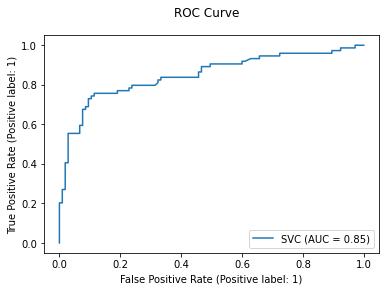

In [49]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 85%

# Confusion Matrix

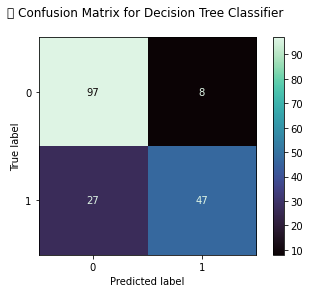

In [50]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)

# Saving the model

In [51]:
filename = "FinalModel_5.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_5.pkl']

Finally I am saving my best classification model using the joblib library.